In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
spotify_df = pd.read_csv("data/data.csv")
spotify_df.columns
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
spotify_df["year"] = pd.to_numeric(spotify_df["year"])

In [5]:
spotify_df = spotify_df.drop_duplicates(subset=["name", "artists"]).reset_index().drop('index', axis=1)
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_features = spotify_df[["id", "name", "artists", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_features.index = df_features["id"]
df_features.drop('id', axis=1, inplace=True)
X_scaled = scaler.fit_transform(df_features.drop(['popularity', 'name', 'artists'], axis=1))

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0, 0.5, 'WCSS')

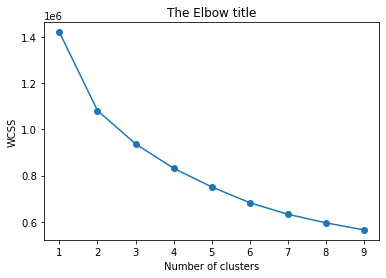

In [8]:
# Finding number of clusters
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss, marker='o')
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [9]:
model = KMeans(3, )
model.fit(X_scaled)
print(len(model.labels_))

157685


In [10]:
df_features["cluster_label"] = model.labels_
df_features.head()

/var/folders/v1/cr8s8tnj3jd2_c30fzmgmq300000gn/T/ipykernel_34846/2221652999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["cluster_label"] = model.labels_


,name,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,cluster_label
id,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954,0.0594,4,1
7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936,0.9630,5,2
1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339,0.0394,5,1
3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109,0.1650,3,1
4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665,0.2530,2,1


In [11]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from data.spotify_keys import get_credentials

In [12]:
cid, secret = get_credentials()

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [13]:
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value
    df_ret = pd.DataFrame(song_data)
    return df_ret[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity"]]

In [14]:
df_record = find_song("good 4 u", 2021)
p = model.predict(df_record.drop('popularity', axis=1))
p[0]


0

In [15]:
max(df_features['popularity'])

100

In [16]:
# Recommend songs
result = df_features.sort_values(by=['popularity'], ascending=False)
result

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,cluster_label
id,,,,,,,,,,,,,
47EiUVwUp4C9fGccaPuUCS,Dakiti,"['Bad Bunny', 'Jhay Cortez']",0.40100,0.731,0.5730,0.000052,0.1130,-10.059,0.0544,109.928,0.14500,100,0
3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",0.22100,0.700,0.7220,0.000000,0.2720,-3.558,0.0369,90.989,0.75600,99,0
0t1kP63rueHleOhQkYSXFY,Dynamite,['BTS'],0.01120,0.746,0.7650,0.000000,0.0936,-4.410,0.0993,114.044,0.73700,97,0
4Oun2ylbjFKMPTiaSbbCih,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",0.01940,0.935,0.4540,0.000000,0.0824,-7.509,0.3750,133.073,0.35700,96,0
1tkg4EHVoqnhR6iFEXb60y,What You Know Bout Love,['Pop Smoke'],0.65000,0.709,0.5480,0.000002,0.1330,-8.493,0.3530,83.995,0.54300,96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5p8yXZcDrXC72yHm7ApBBh,"Fidelio, Op. 72: Gott, welch' Dunkel hier","['Ludwig van Beethoven', 'Franz Völker', 'Staa...",0.99100,0.249,0.0874,0.037000,0.1220,-18.236,0.0452,82.058,0.07930,0,1
5oCujyZuzKRk3SMSNZRwnT,Gangsta Law,['SURF'],0.00748,0.306,0.5820,0.542000,0.3800,-6.564,0.0500,171.055,0.38300,0,0
5jZxzV8PAjtGLSak00YBOe,En la Cruz del Yugo - Remasterizado,['Ignacio Corsini'],0.99500,0.553,0.2810,0.042300,0.1930,-18.735,0.2080,121.379,0.62300,0,1


In [17]:
recs = result[result["cluster_label"]==p[0]][["name", "artists"]].head(5)
recs

,name,artists
id,,
47EiUVwUp4C9fGccaPuUCS,Dakiti,"['Bad Bunny', 'Jhay Cortez']"
3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),"['24kGoldn', 'iann dior']"
0t1kP63rueHleOhQkYSXFY,Dynamite,['BTS']
4Oun2ylbjFKMPTiaSbbCih,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']"
1tkg4EHVoqnhR6iFEXb60y,What You Know Bout Love,['Pop Smoke']


In [20]:
correct = 0
df_test = df_features.head(10000)
pred = model.predict(df_test.drop(["cluster_label", "name", "artists", "popularity"], axis=1))
pred_df = pd.DataFrame({"actual": df_test["cluster_label"], "pred": pred})
len(pred_df)

10000

In [21]:
for i in range(len(model.labels_[:10000])):
    if pred[i] == model.labels_[i]:
        correct+=1
print(correct/len(model.labels_[:10000]))

0.3422
